# 10. Time Series 

### Date and Time Data Types and Tools

In [1]:
from datetime import datetime

In [2]:
now = datetime.now()

In [3]:
now

datetime.datetime(2017, 3, 16, 21, 40, 53, 688442)

In [4]:
now.year, now.month, now.day

(2017, 3, 16)

In [5]:
delta = datetime(2011,11,7) - datetime(2008,6,24,8,15)

In [6]:
delta

datetime.timedelta(1230, 56700)

In [7]:
delta.days

1230

In [8]:
delta.seconds

56700

In [9]:
from datetime import timedelta

In [10]:
start = datetime(2011,1,7)
start

datetime.datetime(2011, 1, 7, 0, 0)

In [11]:
start + timedelta(12) # 12일 추가 

datetime.datetime(2011, 1, 19, 0, 0)

In [12]:
start - 2 * timedelta(12) # 24일 빼기. 

datetime.datetime(2010, 12, 14, 0, 0)

#### Types in datetime module 
 - date : Store calendar date (year, month, day) using the Gregorian calendar.
 - time : Store time of day as hours, minutes, seconds, and microseconds
 - datetime : Stores both date and time
 - timedelta : Represents the difference between two datetime values (as days, seconds, and microseconds)

### Converting between string and datetime

In [13]:
stamp = datetime(2011,1,3)
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
str(stamp)

'2011-01-03 00:00:00'

In [15]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

 Converting strings to dastes using **datetime.strptime**
  - datetime.strptime is the best way to parse a date with a known format.

In [16]:
value = '2011-01-03'

In [17]:
datetime.strptime(value,"%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
datestrs = ['7/6/2011','8/6/2011']
datestrs

['7/6/2011', '8/6/2011']

In [19]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

- especially for common date formats. In this case, you can use the parser.parse method in the third party dateutil package

In [20]:
from dateutil.parser import parse

In [21]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

 - dateutil is capable of parsing almost any human-intelligible date representation

In [22]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

 - In international locales, day appearing before month is very common, so you can pass dayfirst=True to indicate this

In [23]:
parse('6/11/2013', dayfirst=True)

datetime.datetime(2013, 11, 6, 0, 0)

 - **Pandas** is generally oriented toward working with arrays of dates. whether used as an axis index or a column in a DataFrame.

In [24]:
import pandas as pd

In [25]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [26]:
idx = pd.to_datetime(datestrs + [None])

In [27]:
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [28]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

|Type | Description |   
|---|---|
|%Y |4-digit year|
|%y |2-digit year|
|%m |2-digit month [01, 12]|
|%d |2-digit day [01, 31]|
|%H |Hour (24-hour clock) [00, 23]|
|%I |Hour (12-hour clock) [01, 12]|
|%M |2-digit minute [00, 59]|
|%S |Second [00, 61] (seconds 60, 61 account for leap seconds)|
|%w |Weekday as integer [0 (Sunday), 6]|
|%U |Week number of the year [00, 53]. Sunday is considered the first day of the week, and days before the first Sunday of the year are “week 0”.|
|%W |Week number of the year [00, 53]. Monday is considered the first day of the week, and days before the first Monday of the year are “week 0”.|
|%z |UTC time zone offset as +HHMM or -HHMM, empty if time zone naive|
|%F |Shortcut for %Y-%m-%d, for example 2012-4-18|
|%D |Shortcut for %m/%d/%y, for example 04/18/12|

## Time Series Basics
 - The most basic kind of time series object in pandas is a Series indexed by timestamps, which is often represented external to pandas as Python strings or datetime objects

In [29]:
from datetime import datetime
from pandas import Series
import numpy as np

In [30]:
%matplotlib inline

In [31]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
 datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [32]:
dates

[datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 8, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 12, 0, 0)]

In [33]:
ts = Series(np.random.randn(6), index= dates)

In [34]:
ts

2011-01-02    1.010824
2011-01-05   -0.827504
2011-01-07    0.231739
2011-01-08   -1.072183
2011-01-10   -1.291241
2011-01-12   -1.195623
dtype: float64

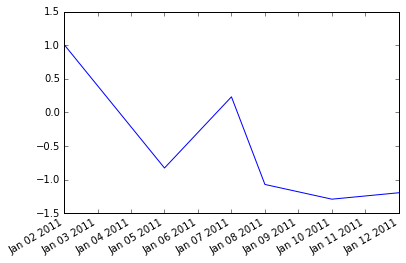

In [35]:
ts.plot()

In [36]:
type(ts)

pandas.core.series.Series

In [37]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [38]:
ts[::2] # 2개씩 뛰어넘어서 0, 2, 4 이렇게 

2011-01-02    1.010824
2011-01-07    0.231739
2011-01-10   -1.291241
dtype: float64

In [39]:
ts + ts[::2]

2011-01-02    2.021649
2011-01-05         NaN
2011-01-07    0.463479
2011-01-08         NaN
2011-01-10   -2.582482
2011-01-12         NaN
dtype: float64

In [40]:
ts.index.dtype

dtype('<M8[ns]')

In [41]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [42]:
stamp = ts.index[2]
stamp

Timestamp('2011-01-07 00:00:00')

In [43]:
ts[stamp]

0.23173939504730645

In [44]:
ts['1/10/2011']

-1.2912410819411362

In [45]:
ts['2011/1/10']

-1.2912410819411362

In [46]:
longer_ts = Series(np.random.randn(1000),index=pd.date_range('1/1/2000', periods=1000))
longer_ts[:10]

2000-01-01    0.840054
2000-01-02   -1.882773
2000-01-03    0.953597
2000-01-04   -0.353093
2000-01-05   -0.612614
2000-01-06   -0.435995
2000-01-07   -1.183283
2000-01-08   -0.352014
2000-01-09   -0.976819
2000-01-10   -2.309383
Freq: D, dtype: float64

In [47]:
longer_ts.dtype

dtype('float64')

 - Slicing with dates works just like with a regular Series

In [48]:
longer_ts['2001'][:10] 

2001-01-01    0.149647
2001-01-02    0.361493
2001-01-03    1.306994
2001-01-04    0.794680
2001-01-05   -0.948079
2001-01-06   -0.169764
2001-01-07   -1.182433
2001-01-08    0.427692
2001-01-09    0.413821
2001-01-10    0.729394
Freq: D, dtype: float64

In [49]:
longer_ts['2001-05'][:10]

2001-05-01   -0.148209
2001-05-02   -0.889187
2001-05-03   -0.916709
2001-05-04    1.470740
2001-05-05    0.187793
2001-05-06    0.112098
2001-05-07   -1.468124
2001-05-08    1.164895
2001-05-09   -0.924753
2001-05-10    0.494538
Freq: D, dtype: float64

In [50]:
ts[datetime(2011,1,7):] # 2011-01-07 이후로 데이터 가지고 오기.

2011-01-07    0.231739
2011-01-08   -1.072183
2011-01-10   -1.291241
2011-01-12   -1.195623
dtype: float64

In [51]:
ts

2011-01-02    1.010824
2011-01-05   -0.827504
2011-01-07    0.231739
2011-01-08   -1.072183
2011-01-10   -1.291241
2011-01-12   -1.195623
dtype: float64

In [52]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.231739
2011-01-08   -1.072183
2011-01-10   -1.291241
dtype: float64

 - There is an equivalent instance method truncate which slices a TimeSeries between two dates
 - p. 296

In [53]:
ts.truncate(after='1/9/2011')

2011-01-02    1.010824
2011-01-05   -0.827504
2011-01-07    0.231739
2011-01-08   -1.072183
dtype: float64

In [54]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED') # 수요일마다 일주일씩 반복. 100개.
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [55]:
from pandas import DataFrame

In [56]:
long_df = DataFrame(np.random.randn(100, 4),
     index=dates,
     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.head()

,Colorado,Texas,New York,Ohio
2000-01-05,1.311397,0.223291,1.438332,-0.355794
2000-01-12,0.519620,-0.250452,1.044134,-1.568872
2000-01-19,-1.296163,-0.824740,-0.963404,-0.121856
2000-01-26,0.133180,-1.852214,-0.005779,-0.261996
2000-02-02,0.819559,-0.417367,-0.330085,0.884128


In [57]:
long_df.ix['5-2001'] # 2001년 5월 데이터만.

,Colorado,Texas,New York,Ohio
2001-05-02,0.094916,-0.160322,-1.915171,-1.178053
2001-05-09,0.436058,0.683919,0.726466,0.412441
2001-05-16,0.924977,-1.392092,0.378130,0.184220
2001-05-23,-1.692509,-1.198413,-0.908680,-0.015472
2001-05-30,-0.108036,0.529662,-1.357614,2.715064


## Time Series with Duplicate Indices

In [58]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
  '1/3/2000'])
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

In [59]:
dup_ts = Series(np.arange(5),index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [60]:
dup_ts.index.is_unique

False

In [61]:
dup_ts['1/3/2000'] # not duplicated

4

In [62]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

#### Aggregate the data with index(having non-unique timestamps) 
 - level = 0 (the only level of indexing)

In [63]:
grouped = dup_ts.groupby(level=0)

In [64]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [65]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting

In [66]:
ts

2011-01-02    1.010824
2011-01-05   -0.827504
2011-01-07    0.231739
2011-01-08   -1.072183
2011-01-10   -1.291241
2011-01-12   -1.195623
dtype: float64

In [67]:
ts.resample('D') # ??????

C:\Anaconda3\envs\work\lib\site-packages\IPython\utils\dir2.py:65: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  canary = getattr(obj, '_ipython_canary_method_should_not_exist_', None)
C:\Anaconda3\envs\work\lib\site-packages\IPython\utils\dir2.py:74: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  m = getattr(obj, name, None)


DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [68]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [69]:
pd.date_range(start='4/1/2012', periods=20) #시작일 기준으로 뒤로 20일.

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [70]:
pd.date_range(end='6/1/2012', periods=20) #맨 마지막을 기준으로 앞으로 20일

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

#### Index containing the last businessday of each month 

In [71]:
pd.date_range('1/1/2000', '12/1/2000', freq='BM')  # freq = 'BM' 

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [72]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [73]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True) # Midnight conversion option 'normalize = True'

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## Frequencies and Date Offsets

In [74]:
from pandas.tseries.offsets import Hour, Minute

In [75]:
hour = Hour()
hour

<Hour>

In [76]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [77]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h') # 4시간 씩.

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [78]:
Hour(2) + Minute(30) # 150 Minutes

<150 * Minutes>

In [79]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

|Alias |Offset Type |Description|
|--------|-------|--------|
|D |Day |Calendar daily|
|B |BusinessDay |Business daily|
|H |Hour |Hourly|
|T or min| Minute| Minutely|
|S |Second |Secondly|
|L or ms| Milli |Millisecond (1/1000th of 1 second)|
|U |Micro |Microsecond (1/1000000th of 1 second)|
|M |Month | End Last calendar day of month|
|BM |Business Month End | Last business day (weekday) of month |
|MS | Month Begin| First calendar day of month|
|BMS | Business Month Begin |First weekday of month|
|W-MON, W-TUE, ...| Week | Weekly on given day of week: MON, TUE, WED, THU, FRI, SAT,or SUN.|
|WOM-1MON, WOM-2MON, ... |WeekOfMonth |Generate weekly dates in the first, second, third, or fourth week of the month. For example, WOM-3FRI for the 3rd Friday of each month.|
|Q-JAN, Q-FEB, ... |QuarterEnd |Quarterly dates anchored on last calendar day of each month, for year ending in indicated month: JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC.|
|BQ-JAN, BQ-FEB, ... |Business Quarter End| Quarterly dates anchored on last weekday day of each month, for year ending in indicated month|
|QS-JAN, QS-FEB, ... |Quarter Begin| Quarterly dates anchored on first calendar day of each month, for year ending in indicated month|
|BQS-JAN, BQS-FEB, ... |Business Quarter Begin| Quarterly dates anchored on first weekday day of each month,for year ending in indicated month|
|A-JAN, A-FEB, ... |Year End| Annual dates anchored on last calendar day of given month: JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC.|
|BA-JAN, BA-FEB, ... |Business Year End| Annual dates anchored on last weekday of given month|
|AS-JAN, AS-FEB, ... |Year Begin| Annual dates anchored on first day of given month|
|BAS-JAN, BAS-FEB, ... |Business Year Begin| Annual dates anchored on first weekday of given month|

### Week of month dates
 - “week of month”, starting with WOM. This enables you to get dates like the third Friday of each month:

In [80]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

## Shifting (Leading and Lagging) Data

In [81]:
ts = Series(np.random.randn(4), index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    1.717681
2000-02-29    0.145931
2000-03-31    0.868599
2000-04-30   -0.714269
Freq: M, dtype: float64

 - 값만 2칸 Shift

In [82]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.717681
2000-04-30    0.145931
Freq: M, dtype: float64

In [83]:
ts.shift(-2)

2000-01-31    0.868599
2000-02-29   -0.714269
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [84]:
ts.shift(2, freq='M') # 달을 2달 shift 

2000-03-31    1.717681
2000-04-30    0.145931
2000-05-31    0.868599
2000-06-30   -0.714269
Freq: M, dtype: float64

In [85]:
ts.shift(3, freq='D') # 3일씩 Index Shift

2000-02-03    1.717681
2000-03-03    0.145931
2000-04-03    0.868599
2000-05-03   -0.714269
dtype: float64

In [86]:
ts.shift(1, freq='3D') # 3d일씩

2000-02-03    1.717681
2000-03-03    0.145931
2000-04-03    0.868599
2000-05-03   -0.714269
dtype: float64

In [87]:
ts.shift(1, freq='90T') # 1시간 30분

2000-01-31 01:30:00    1.717681
2000-02-29 01:30:00    0.145931
2000-03-31 01:30:00    0.868599
2000-04-30 01:30:00   -0.714269
Freq: M, dtype: float64

### Shifting dates with offsets

In [88]:
from pandas.tseries.offsets import Day, MonthEnd 

In [89]:
now = datetime(2011,11,17)
now

datetime.datetime(2011, 11, 17, 0, 0)

In [91]:
now + 3 * Day() # 3일 추가.

Timestamp('2011-11-20 00:00:00')

In [92]:
now + MonthEnd() # 해당 달의 마지막날로 이동.

Timestamp('2011-11-30 00:00:00')

In [93]:
now + MonthEnd(2) # 다음달 마지막날로 

Timestamp('2011-12-31 00:00:00')

Anchored offsets can explicitly “roll” dates forward or backward using their rollfor
ward and rollback methods, respectively:

In [94]:
offset = MonthEnd()
offset

<MonthEnd>

In [97]:
offset.rollforward(now) # 뒤로 적용. 

Timestamp('2011-11-30 00:00:00')

In [98]:
offset.rollback(now) # 앞으로 적용.

Timestamp('2011-10-31 00:00:00')

In [99]:
ts = Series(np.random.randn(20), 
            index = pd.date_range('1/15/2000',periods=20, freq='4d'))
ts # 4일씩 20개 .

2000-01-15    0.286371
2000-01-19   -0.862407
2000-01-23    0.287575
2000-01-27    0.081912
2000-01-31   -0.532614
2000-02-04   -0.263345
2000-02-08    1.286591
2000-02-12    1.898259
2000-02-16    0.985570
2000-02-20   -2.005975
2000-02-24    0.773508
2000-02-28    1.386658
2000-03-03    0.185332
2000-03-07   -0.042612
2000-03-11   -1.388322
2000-03-15   -0.673719
2000-03-19    0.393276
2000-03-23   -0.821285
2000-03-27    0.027883
2000-03-31   -1.814202
Freq: 4D, dtype: float64

In [100]:
ts.groupby(offset.rollforward).mean() # 각 월말로 groupby

2000-01-31   -0.147832
2000-02-29    0.580181
2000-03-31   -0.516706
dtype: float64

In [103]:
ts.groupby(offset.rollforward)

In [105]:
ts.resample('M').mean()

2000-01-31   -0.147832
2000-02-29    0.580181
2000-03-31   -0.516706
Freq: M, dtype: float64

## Periods and Period Arithmetic
 - Periods represent time spans, like days, months, quarters, or years. The Period class represents this data type, requiring a string or integer and a frequency from the above table

In [106]:
p = pd.Period(2007, freq='A-DEC') # January - December
p

Period('2007', 'A-DEC')

In this case, the Period object represents **the full timespan from January 1, 2007 to December 31, 2007, inclusive**. Conveniently, adding and subtracting integers from periods has the effect of shifting by their frequency:

In [107]:
p + 5

Period('2012', 'A-DEC')

In [108]:
p - 2

Period('2005', 'A-DEC')

In [109]:
pd.Period('2014', freq='A-DEC') - p

7

In [110]:
rng = pd.period_range('1/1/2000','6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='int64', freq='M')

In [111]:
rng[0]

Period('2000-01', 'M')

In [112]:
Series(np.random.randn(6), index=rng)

2000-01   -0.180628
2000-02   -0.974635
2000-03   -1.007232
2000-04    1.327897
2000-05   -0.648087
2000-06   -0.826082
Freq: M, dtype: float64

In [113]:
values = ['2001Q3', '2002Q2', '2003Q1']
values

['2001Q3', '2002Q2', '2003Q1']

In [114]:
index = pd.PeriodIndex(values,freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='int64', freq='Q-DEC')

## Period Frequency Conversion
- Periods and PeriodIndex objects can be converted to another frequency using their as freq method

In [115]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [116]:
p + 2

Period('2009', 'A-DEC')

In [119]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [120]:
p.asfreq('M', how='start') + 1

Period('2007-02', 'M')

In [121]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [122]:
p.asfreq('M', how='end') + 1

Period('2008-01', 'M')

In [123]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [124]:
p + 1

Period('2008', 'A-JUN')

In [125]:
p.asfreq('M','start')

Period('2006-07', 'M')

In [126]:
p.asfreq('M','end')

Period('2007-06', 'M')

In [127]:
p = pd.Period('2007-08', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [128]:
rng = pd.period_range('2006','2009',freq='A-DEC')
rng

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='int64', freq='A-DEC')

In [129]:
ts = Series(np.random.randn(len(rng)),index=rng)
ts

2006    0.658603
2007    0.482394
2008   -0.196281
2009   -3.258532
Freq: A-DEC, dtype: float64

In [131]:
ts.asfreq('M',how='start')

2006-01    0.658603
2007-01    0.482394
2008-01   -0.196281
2009-01   -3.258532
Freq: M, dtype: float64

In [132]:
ts.asfreq('M',how='end')

2006-12    0.658603
2007-12    0.482394
2008-12   -0.196281
2009-12   -3.258532
Freq: M, dtype: float64

![Period](1.PNG)

### Quarterly Period Frequencies

In [133]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [134]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [135]:
p.asfreq('D','end')

Period('2012-01-31', 'D')

In [136]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [137]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

![Period](2.PNG)

p310